In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
from gammapy.data import DataStore

In [3]:
from gammapy.catalog import CATALOG_REGISTRY
CATALOG_REGISTRY

[gammapy.catalog.gammacat.SourceCatalogGammaCat,
 gammapy.catalog.hess.SourceCatalogHGPS,
 gammapy.catalog.hawc.SourceCatalog2HWC,
 gammapy.catalog.fermi.SourceCatalog3FGL,
 gammapy.catalog.fermi.SourceCatalog4FGL,
 gammapy.catalog.fermi.SourceCatalog2FHL,
 gammapy.catalog.fermi.SourceCatalog3FHL,
 gammapy.catalog.hawc.SourceCatalog3HWC]

### Use [Gamma-Cat](https://gamma-cat.readthedocs.io/data/catalog.html) Catalog

In [4]:
catalog_gammacat = CATALOG_REGISTRY.get_cls("gamma-cat")()

catalog_gammacat.table[0:5]

source_id,common_name,gamma_names,fermi_names,other_names,where,classes,discoverer,seen_by,discovery_date,tevcat_id,tevcat2_id,tevcat_name,tgevcat_id,tgevcat_name,reference_id,significance,livetime,ra,dec,glon,glat,pos_ra,pos_dec,pos_glon,pos_glat,pos_err,morph_type,morph_sigma,morph_sigma_err,morph_sigma2,morph_sigma2_err,morph_pa,morph_pa_err,morph_pa_frame,spec_type,spec_pl_norm,spec_pl_norm_err,spec_pl_norm_err_sys,spec_pl_index,spec_pl_index_err,spec_pl_index_err_sys,spec_pl_e_ref,spec_pl2_flux,spec_pl2_flux_err,spec_pl2_flux_err_sys,spec_pl2_index,spec_pl2_index_err,spec_pl2_index_err_sys,spec_pl2_e_min,spec_pl2_e_max,spec_ecpl_norm,spec_ecpl_norm_err,spec_ecpl_norm_err_sys,spec_ecpl_index,spec_ecpl_index_err,spec_ecpl_index_err_sys,spec_ecpl_e_cut,spec_ecpl_e_cut_err,spec_ecpl_e_cut_err_sys,spec_ecpl_e_ref,spec_erange_min,spec_erange_max,spec_theta,spec_dnde_1TeV,spec_dnde_1TeV_err,spec_flux_1TeV,spec_flux_1TeV_err,spec_flux_1TeV_crab,spec_flux_1TeV_crab_err,spec_eflux_1TeV_10TeV,spec_eflux_1TeV_10TeV_err,sed_reference_id,sed_n_points,sed_n_ul,sed_e_ref,sed_e_min,sed_e_max,sed_dnde,sed_dnde_err,sed_dnde_errp,sed_dnde_errn,sed_dnde_ul
,,,,,,,,,,,,,,,,,h,deg,deg,deg,deg,deg,deg,deg,deg,deg,,deg,deg,deg,deg,deg,deg,,,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),,,,TeV,1 / (cm2 s),1 / (cm2 s),1 / (cm2 s),,,,TeV,TeV,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),,,,TeV,TeV,TeV,TeV,TeV,TeV,deg,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s),1 / (cm2 s),,,erg / (cm2 s),erg / (cm2 s),,,,TeV,TeV,TeV,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV)
int32,bytes21,bytes76,bytes72,bytes73,bytes4,bytes11,bytes8,bytes35,bytes7,int64,bytes6,bytes14,int64,bytes14,bytes19,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes5,float32,float32,float32,float32,float32,float32,bytes8,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes19,int32,int32,float32[40],float32[40],float32[40],float32[40],float32[40],float32[40],float32[40],float32[40]
1,CTA 1,VER J0006+729,--,SNR G119.5+10.2,gal,"pwn,snr",veritas,veritas,2011-10,227,rC5JCj,TeV J0006+729,1,TeV J0006+7259,2013ApJ...764...38A,7.5,41.25,1.65,72.783,119.58025,10.203682,1.6083333,72.98361,119.603905,10.4033165,0.06,gauss,0.3,0.03,0.24,0.03,17.4,15.8,radec,pl,9.1e-14,1.3e-14,1.7e-14,2.2,0.2,0.3,3.0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,1.0202537e-12,2.6738846e-13,8.502113e-13,1.2956478e-13,4.098503,0.6245761,3.0162344e-12,4.314187e-13,2013ApJ...764...38A,6,0,-- .. --,0.56 .. --,1.0 .. --,1.9e-12 .. --,9e-13 .. --,-- .. --,-- .. --,-- .. --
2,SHBL J001355.9-185406,--,--,--,egal,hbl,hess,hess,2010-11,213,70hRXZ,TeV J0013-188,2,TeV J0013-1853,--,--,--,3.4835584,-18.901848,74.63201,-78.08694,--,--,--,--,--,none,--,--,--,--,--,--,--,none,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0,0,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --
3,Tycho SNR,--,--,"SNR G120.1+1.4,3C10,SN1572",gal,snr,veritas,veritas,2010-05,209,xCyAjF,TeV J0025+641,3,TeV J0025+6410,2017arXiv170106740V,6.9,147.0,6.3397,64.1408,120.09236,1.4129305,6.34,64.13,120.0914,1.4021726,0.024494898,point,--,--,--,--,--,--,--,pl,2.2e-13,5e-14,6e-14,2.92,0.42,0.2,1.0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,2.2e-13,5e-14,1.1458334e-13,3.6144542e-14,0.55235696,0.1742373,3.370669e-13,1.3349918e-13,--,0,0,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --
4,KUV 00311-1938,--,--,--,egal,hbl,hess,hess,2012-07,239,PKJZqs,TeV J0033-193,4,TeV J0033-1921,--,--,--,8.393288,-19.359205,94.174644,-81.2161,--,--,--,--,--,none,--,--,--,--,--,--,--,none,--,--,--,--,--,--,--,--,--,--,--,

#### Spectral Model is Not Available for ALL Sources

In [5]:
example_Gamma_CAT_source = catalog_gammacat["1ES 0033+595"]
example_Gamma_CAT_source.name, type(example_Gamma_CAT_source.spectral_model())

('1ES 0033+595', NoneType)

In [6]:
print ('number of TeV Sources: ', len(catalog_gammacat.table))

number of TeV Sources:  162


#### Select Sources with Defined Spectral Model  

In [7]:
mask_spec_type_none_gamma_cat = np.zeros(len(catalog_gammacat.table), dtype=bool)

for k, source in enumerate(catalog_gammacat):
    if source.spectral_model()==None:
        mask_spec_type_none_gamma_cat[k] = False
    else:
        mask_spec_type_none_gamma_cat[k] = True
        
        
print('total TeV sources: ', len(mask_spec_type_none_gamma_cat))
print ('how many none type spectral model: ', mask_spec_type_none_gamma_cat.sum())        

total TeV sources:  162
how many none type spectral model:  75


In [8]:
catalog_gammacat_spectype = catalog_gammacat[mask_spec_type_none_gamma_cat]
print ('check length: ', len(catalog_gammacat_spectype.table))
catalog_gammacat_spectype.table[5:10]

check length:  75


source_id,common_name,gamma_names,fermi_names,other_names,where,classes,discoverer,seen_by,discovery_date,tevcat_id,tevcat2_id,tevcat_name,tgevcat_id,tgevcat_name,reference_id,significance,livetime,ra,dec,glon,glat,pos_ra,pos_dec,pos_glon,pos_glat,pos_err,morph_type,morph_sigma,morph_sigma_err,morph_sigma2,morph_sigma2_err,morph_pa,morph_pa_err,morph_pa_frame,spec_type,spec_pl_norm,spec_pl_norm_err,spec_pl_norm_err_sys,spec_pl_index,spec_pl_index_err,spec_pl_index_err_sys,spec_pl_e_ref,spec_pl2_flux,spec_pl2_flux_err,spec_pl2_flux_err_sys,spec_pl2_index,spec_pl2_index_err,spec_pl2_index_err_sys,spec_pl2_e_min,spec_pl2_e_max,spec_ecpl_norm,spec_ecpl_norm_err,spec_ecpl_norm_err_sys,spec_ecpl_index,spec_ecpl_index_err,spec_ecpl_index_err_sys,spec_ecpl_e_cut,spec_ecpl_e_cut_err,spec_ecpl_e_cut_err_sys,spec_ecpl_e_ref,spec_erange_min,spec_erange_max,spec_theta,spec_dnde_1TeV,spec_dnde_1TeV_err,spec_flux_1TeV,spec_flux_1TeV_err,spec_flux_1TeV_crab,spec_flux_1TeV_crab_err,spec_eflux_1TeV_10TeV,spec_eflux_1TeV_10TeV_err,sed_reference_id,sed_n_points,sed_n_ul,sed_e_ref,sed_e_min,sed_e_max,sed_dnde,sed_dnde_err,sed_dnde_errp,sed_dnde_errn,sed_dnde_ul
,,,,,,,,,,,,,,,,,h,deg,deg,deg,deg,deg,deg,deg,deg,deg,,deg,deg,deg,deg,deg,deg,,,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),,,,TeV,1 / (cm2 s),1 / (cm2 s),1 / (cm2 s),,,,TeV,TeV,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),,,,TeV,TeV,TeV,TeV,TeV,TeV,deg,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s),1 / (cm2 s),,,erg / (cm2 s),erg / (cm2 s),,,,TeV,TeV,TeV,1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV),1 / (cm2 s TeV)
int32,bytes21,bytes76,bytes72,bytes73,bytes4,bytes11,bytes8,bytes35,bytes7,int64,bytes6,bytes14,int64,bytes14,bytes19,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes5,float32,float32,float32,float32,float32,float32,bytes8,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes19,int32,int32,float32[40],float32[40],float32[40],float32[40],float32[40],float32[40],float32[40],float32[40]
26,30 Dor C,--,--,--,egal,other,hess,hess,2014-10,255,C6fp9j,TeV J0535-692,26,TeV J0535-6911,2015Sci...347..406H,8.8,183.0,83.9617,-69.2061,279.624,-31.911823,81.479164,-69.18611,279.75443,-32.786797,0.010758287,point,--,--,--,--,--,--,--,pl,1.6e-13,4e-14,4.8e-14,2.6,0.2,0.3,1.0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,1.6e-13,4e-14,1e-13,2.7950849e-14,0.482057,0.13473903,3.1992746e-13,9.834239e-14,2015Sci...347..406H,9,1,1.014 .. --,-- .. --,-- .. --,2.268e-13 .. --,-- .. --,1.358e-13 .. --,3.314e-13 .. --,-- .. --
27,N 157B,HESS J0537-691,--,"LHA 120-N 157B,PSR J0537-6910",egal,pwn,hess,hess,2012-01,236,8hS5e7,TeV J0537-691,27,TeV J0537-6909,2015Sci...347..406H,33.0,181.0,84.44443,-69.17141,279.55872,-31.745857,--,--,--,--,--,point,--,--,--,--,--,--,--,pl,1.3e-12,1e-13,3.9e-13,2.8,0.1,0.3,1.0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,1.3e-12,1e-13,7.222222e-13,6.852964e-14,3.4815228,0.33035192,2.1909041e-12,2.4574445e-13,2015Sci...347..406H,17,1,0.873 .. --,-- .. --,-- .. --,8.268e-13 .. --,-- .. --,4.432e-13 .. --,1.302e-12 .. --,-- .. --
29,IC 443,MAGIC 0616+223,--,"3C 157,SNR 189.1+03.0",gal,snr,magic,"magic,veritas,milagro",2007-05,120,9xMcgD,TeV J0616+225,29,TeV J0616+2230,2015arXiv151201911H,--,155.0,94.51125,22.66,189.06482,3.2349896,94.22,23.55,188.15218,3.4186838,--,shell,0.3,--,--,--,--,--,--,pl,9.92e-13,9e-14,--,2.8,0.09,--,0.55,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0.19,--,0.3,1.860061e-13,1.9620061e-14,1.03336725e-13,1.4246503e-14,0.4981419,0.06867626,3.134781e-13,4.8997122e-14,--,0,0,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --,-- .. --
30,HESS J0632+057,"HESS J0632+057,VER J0633+057",--,HD 259440,

### Check Parameter Distribution of Spectral Models

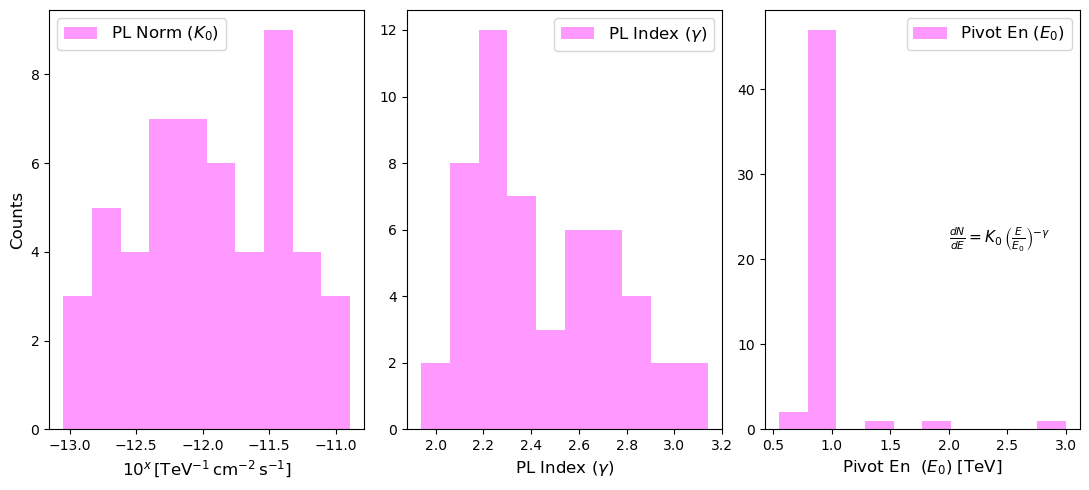

In [9]:
fig = plt.figure(figsize=(11, 5))
fig.add_subplot(131)
plt.hist(np.log10(catalog_gammacat_spectype.table['spec_pl_norm']), label=r'PL Norm $(K_0)$', 
         color='magenta', alpha=0.4)
plt.xlabel(r'$10^x\, \left[\mathrm{TeV}^{-1}\, \mathrm{cm}^{-2}\, \mathrm{s}^{-1} \right]$', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(fontsize=12)
fig.add_subplot(132)
plt.hist(catalog_gammacat_spectype.table['spec_pl_index'], label=r'PL Index $(\gamma)$', 
         color='magenta', alpha=0.4)
plt.xlabel(r'PL Index $(\gamma)$', fontsize=12)
plt.legend(fontsize=12)
fig.add_subplot(133)
plt.hist(catalog_gammacat_spectype.table['spec_pl_e_ref'], label=r'Pivot En $(E_0)$', 
         color='magenta', alpha=0.4)
plt.xlabel(r'Pivot En  $(E_0)$ [TeV]', fontsize=12)
plt.text(2.0, 22, r'$\frac{dN}{dE} = K_0\, \left(\frac{E}{E_0}\right)^{-\gamma}$', fontsize=11)
plt.legend(fontsize=12)
plt.tight_layout()
# plt.savefig('./gamma-cat-params-dist.png', dpi=200)
plt.show()